# T12 Classifcation and clustering

## Cross-validating support vector machine classifier 

In today's tutorial, we will use the constructed data example from class to check how well a trained classifier separtes the data. 

The data was obtained through (hypothetical) extracellular recordings *in vivo* and post-experiment reconstruction of the recorded neurons. Firing rates (in spk/s), spike width is extracted from the extracellular recordings and the reconstruction yields the identity of the neuron, either an excitatory pyramidal cell or an inhibitory fast-spiking basket cell. 

First we will use the the **Support Vector Machine (SVM)** classifier (from the scikit-learn implementation) to learn the separation of the data in the two neuron types. 

Later, we will check the performance of the classifer through cross-validation. 

#### 1. Construction of the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(1020203)
spikeWidthPy = np.random.normal(350,50,200)
spikeWidthFS = np.random.normal(190,40,100)

spikeWidth = np.concatenate((spikeWidthPy,spikeWidthFS))

firingRatePy = np.random.exponential(3,200)
firingRateFS = np.random.exponential(10,100)
firingRateFS +=3

firingRate = np.concatenate((firingRatePy,firingRateFS))

neuronType = np.zeros(300)
neuronType[200:]=1

Xdata = np.column_stack((spikeWidth,firingRate))
Ydata = neuronType

#### 2. Data visualization

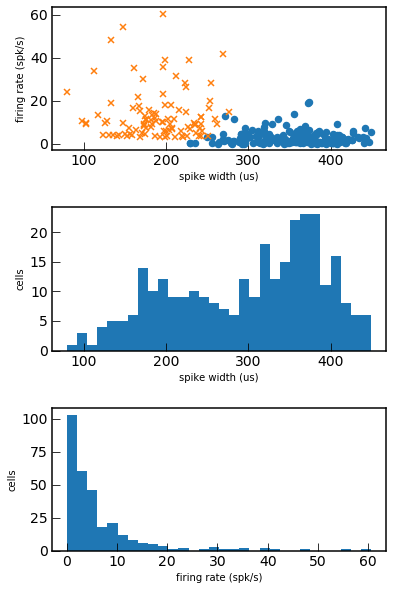

In [2]:

fig = plt.figure(figsize=(6,10))
fig.subplots_adjust(hspace=0.4)
ax = fig.add_subplot(311)
#ax.plot(spikeWidth[:200],firingRate[:200],'o')
ax.plot(spikeWidth[:200],firingRate[:200],'o')
ax.plot(spikeWidth[200:],firingRate[200:],'x')
ax.set_ylabel('firing rate (spk/s)')
ax.set_xlabel('spike width (us)')

ax1 = fig.add_subplot(312)
ax1.hist(spikeWidth,bins=30)
ax1.set_xlabel('spike width (us)')
ax1.set_ylabel('cells')

ax2 = fig.add_subplot(313)
ax2.hist(firingRate,bins=30)
ax2.set_xlabel('firing rate (spk/s)')
ax2.set_ylabel('cells')

plt.show()


#### 3. Implementation of the Support Vector Machine classification

The `svm` package from the scikit-learn library (`sklearn`) is used to implement the support vector machine classifier below. 


/home/mgraupe/.virtualenvs/locorungs/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


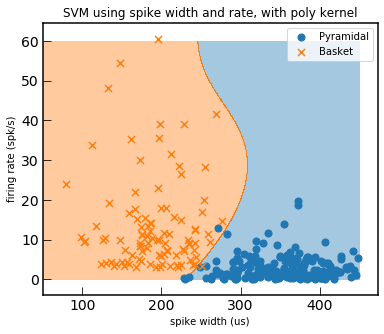

In [3]:
from sklearn import svm #1
from matplotlib.colors import ListedColormap #2


clf = svm.SVC(kernel='poly') #3 creates instance of svm 
clf.fit(Xdata, Ydata) #4 trains the SVM on the data 


# figure production 
fig=plt.figure(figsize=(6,5)) #5
markershape = ['o','x'] #6
markercolor = ['C0','C1'] #7
markerlabel = ['Pyramidal','Basket'] #8

gridRes=0.1 #9 
cmap = ListedColormap(markercolor) #10
maxvalX = 450. #11
minvalX = 50   #12
maxvalY = 60   #13
minvalY = 0    #14
xgrid,ygrid=np.meshgrid(np.arange(minvalX,maxvalX,gridRes),np.arange(minvalY,maxvalY,gridRes)) #15
Z = clf.predict(np.array([xgrid.flatten(),ygrid.flatten()]).T) #16 predicts class for the plot area 
Z = Z.reshape(xgrid.shape) #17
plt.contourf(xgrid,ygrid,Z,alpha=0.4,cmap=cmap) #18
for yind,yval in enumerate(set(Ydata)): #19
    plt.scatter(x=Xdata[Ydata==yval,0], y=Xdata[Ydata==yval,1], c=markercolor[yind],marker=markershape[yind], label=markerlabel[yind],s=50) #20
plt.xlabel('spike width (us)');plt.ylabel('firing rate (spk/s)')#21
plt.title('SVM using spike width and rate, with '+clf.kernel+' kernel') #22
plt.legend() #23


#### 4. Check the performance of the classifier 

We want to evaluate the classification error of the SVM. In other words, we want to assess how well the SVM classifies new data-points. We will do this through *cross-validation*. The idea is to train the classifier  on only 90 % of the data and test whether the remaining 10 % of the data are correctly classfied. 

Write a routine with fits 10 times the above SVM classifier to 90 % of the data, the test dataset. Use the remaining 10 %  - test dataset  - to evaluate the performance of the classifier. That means, calculate the percentage of erronous classification. Note, the split between training and test dataset should be different in each run.

Use the function `clf.predict(xTest)` to calculate the predictions with the trained classifier from the test dataset.

**Hint:** Split the dataset in train- and test subsets using the scikit-learn function `train_test_split()`. Check online which type of inputs this function takes and how to use it. 

In [5]:
# your code goes here 
from sklearn.model_selection import train_test_split

nIterations = 10

polyDegrees = [3]

for j in polyDegrees:
    allErrorRates = []
    clf = svm.SVC(kernel='poly',degree=j)
    for n in range(nIterations):
        print('iteration number :',n)
        xTrain, xTest, yTrain, yTest = train_test_split(Xdata,Ydata, test_size=0.1)

        clf.fit(xTrain, yTrain) 
        #print('...fitting done')

        yPredict = clf.predict(xTest)
        correctClassifications = sum(yTest == yPredict)
        errorRate = 1. - correctClassifications/len(yTest)
        allErrorRates.append(errorRate)
    print('Polynomial degree :', j)
    print('error rate : ', np.mean(allErrorRates))
    #print(sum(np.equal(yTest,yPredict)))
        


iteration number : 0


/home/mgraupe/.virtualenvs/locorungs/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


iteration number : 1


/home/mgraupe/.virtualenvs/locorungs/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


iteration number : 2


/home/mgraupe/.virtualenvs/locorungs/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


iteration number : 3


/home/mgraupe/.virtualenvs/locorungs/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


iteration number : 4


/home/mgraupe/.virtualenvs/locorungs/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


iteration number : 5


/home/mgraupe/.virtualenvs/locorungs/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


iteration number : 6


/home/mgraupe/.virtualenvs/locorungs/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


iteration number : 7


/home/mgraupe/.virtualenvs/locorungs/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


iteration number : 8


/home/mgraupe/.virtualenvs/locorungs/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


iteration number : 9


/home/mgraupe/.virtualenvs/locorungs/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Polynomial degree : 3
error rate :  0.019999999999999997


## The end